# Examen Parcial n°1 2da Parte - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).


### Criterios de Evaluación:

1. No esta permitido el uso de IAs durante el examen. (Desactivar Copilot o cualquier herramienta de IA para autocompletar codigo.)

2. Se deben utilizar nombres de variables descriptivos y claros (Utilizar la nomeclatura correspondiente para los nombres de variables).

3. Comentarios claros y concisos que expliquen el propósito de cada sección del código en una celda de markdown antes del código.

4. Utilizar mensajes de commit descriptivos. (Puedes utilizar la extension CONVENTIONAL COMMIT de VS-CODE).

5. Entrega en tiempo y forma (Parciales entregados fuera de hora o con commits pasados el horario de entrega quedará invalidado.)

6. Todo el código desarrollado debe ser subido a un repositorio en GitHub (el nombre del repositorio de seguir la siguiente estructura: 
**parcial1_tlp3_nombre_apellido**).

7. Para resolver las actividades se debe insertar casillas de codigo entre cada actividad del cuaderno de Jupyter.

8. Deben trabajar con el datasets adjunto.

9. Una vez finalizado el examen, los resultados deben quedar guardados debajo de cada celda (NO EJECUTAR LA OPCIÓN "borrar todas las salidas").

**Importante:** Una vez finalizado el examen, marcar como completado en el classroom.

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de VENTAS en un DataFrame.

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. 
- 2.1: Visualizar las primeras filas y ultimas.
- 2.2: Obtener informacion del df con su metodo correspondiente.
- 2.3: Hacer un conteo de valores nulos.

### 3. Limpieza y Normalización de los Datos

- 3.1. Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes (Deben aplicar los metodos que ustedes crean convenientes **(Solo 1)**, por ejemplo: Eliminación de filas, cubrir valores con media, mediana, etc.)
- 3.2: La columna Fecha deberan pasarla al tipo datetime con su metodo correspondiente.
- 3.3: Corregir las mayusculas en el caso de Nombre y Apellido (Si es que corresponde.)


### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben hacer lo siguiente: 

- 4.1: calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos.
- 4.2: Calcular estadísticas específicas por grupo (Agrupar dos columnas).

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear **UNA** visualización que permitan comprender mejor los datos de ventas.El grafico es a elección, puede crear **UNO** de los siguientes: histogramas, diagramas de dispersión, gráficos de barras y graficos de torta.

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Deben hacer una conexión y hacer una consulta para ver si los datos fueron cargados correctamente.



### importar los datos
leer el archivo y crear el dataframe

leemos los datos con pd.read_csv

In [33]:
import pandas as pd

df =pd.read_csv('ventas.csv')


## exploracion inicial de los datos

In [34]:
print(df.head())

print(df.tail())

print(df.info())

df.isnull().sum()

   ID_Venta Nombre_Cliente Apellido_Cliente       Fecha  \
0         1            Ana           García  01-05-2024   
1         2         Carlos            López  2024-01-08   
2         3          sofía         martínez  2024-01-12   
3         4          pedro        rodríguez  2024-01-15   
4         5          Laura          Sánchez  18-01-2024   

                Producto  Cantidad  Precio_Unitario  Total_Venta  \
0                 Laptop         1          1200.50      1200.50   
1      Mouse Inalámbrico         2            25.75        51.50   
2       Teclado Mecánico         1            75.99        75.99   
3    Monitor 24 pulgadas         1              NaN          NaN   
4  Auriculares Bluetooth         1            99.95        99.95   

              Metodo_Pago Region  
0      Tarjeta de Crédito  Norte  
1                Efectivo    Sur  
2  Transferencia Bancaria   Este  
3       Tarjeta de Débito  Oeste  
4      Tarjeta de Crédito  Norte  
     ID_Venta Nombre_Clien

ID_Venta             0
Nombre_Cliente       0
Apellido_Cliente     0
Fecha                0
Producto             4
Cantidad             0
Precio_Unitario     13
Total_Venta         13
Metodo_Pago         11
Region               5
dtype: int64

### Limpieza y normalizacion de datos

rellenamos los datos nulos con la mediana de los valores de precio unitario y total venta y cantidad

pasar los datos de la columna fecha a datetime

Corregir las mayusculas de las columnas nombre y apellido

In [37]:
df['Precio_Unitario'] = df['Precio_Unitario'].fillna(df['Precio_Unitario'].median())

df['Total_Venta'] = df['Total_Venta'].fillna(df['Total_Venta'].median())

df['Cantidad'] = df['Cantidad'].fillna(df['Cantidad'].median())

def convertir_fecha(fecha):
    formatos = ["%d-%m-%Y","%Y-%m-%d"]
    for frm in formatos:
        try:
            return pd.to_datetime(fecha, format=frm)
        except ValueError:
            continue
    return pd.NaT
        
df['Fecha'] = df['Fecha'].apply(convertir_fecha)

df['Nombre_Cliente'] = df['Nombre_Cliente'].str.strip()
df['Nombre_Cliente']= df['Nombre_Cliente'].str.replace('\\s+',' ', regex=True)
df['Nombre_Cliente']= df['Nombre_Cliente'].str.title()

df['Apellido_Cliente'] = df['Apellido_Cliente'].str.strip()
df['Apellido_Cliente']= df['Apellido_Cliente'].str.replace('\\s+',' ', regex=True)
df['Apellido_Cliente']= df['Apellido_Cliente'].str.title()
df.head()

,ID_Venta,Nombre_Cliente,Apellido_Cliente,Fecha,Producto,Cantidad,Precio_Unitario,Total_Venta,Metodo_Pago,Region
0,1,Ana,García,2024-05-01,Laptop,1,1200.50,1200.50,Tarjeta de Crédito,Norte
1,2,Carlos,López,2024-01-08,Mouse Inalámbrico,2,25.75,51.50,Efectivo,Sur
2,3,Sofía,Martínez,2024-01-12,Teclado Mecánico,1,75.99,75.99,Transferencia Bancaria,Este
3,4,Pedro,Rodríguez,2024-01-15,Monitor 24 pulgadas,1,90.99,97.25,Tarjeta de Débito,Oeste
4,5,Laura,Sánchez,2024-01-18,Auriculares Bluetooth,1,99.95,99.95,Tarjeta de Crédito,Norte


### Estadisticas descriptivas

In [ ]:
df.describe()

,ID_Venta,Fecha,Cantidad,Precio_Unitario,Total_Venta
count,105.000000,105,105.000000,105.000000,105.000000
mean,53.000000,2024-06-21 13:42:51.428571392,1.190476,222.084952,232.019143
min,1.000000,2024-01-08 00:00:00,1.000000,2.000000,0.000000
25%,27.000000,2024-04-09 00:00:00,1.000000,55.000000,62.750000
50%,53.000000,2024-07-05 00:00:00,1.000000,90.990000,97.250000
75%,79.000000,2024-09-06 00:00:00,1.000000,165.000000,185.200000
max,105.000000,2024-10-22 00:00:00,4.000000,1800.990000,1800.990000
std,30.454885,NaN,0.538788,370.809510,357.618804


### grafico

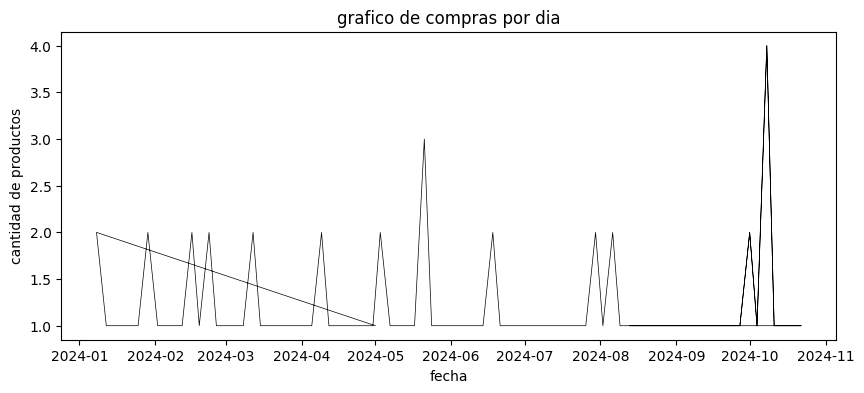

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize= (10,4))

plt.plot(df['Fecha'],df['Cantidad'], color='black', linewidth=0.5)

plt.xlabel('fecha')
plt.ylabel('cantidad de productos')

plt.title('grafico de compras por dia')

plt.show()

### exportar archivo

In [ ]:
import sqlite3

conn = sqlite3.connect('ventas.db')

df.to_sql('ventas', conn, if_exists='replace', index=False)

conn.close()